<a href="https://colab.research.google.com/github/navyajain7105/Digital-Image-Processing/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#!ls /content/drive/MyDrive

Mounted at /content/drive


<PIL.Image.Image image mode=RGB size=1194x1800 at 0x79B1958C4A90>


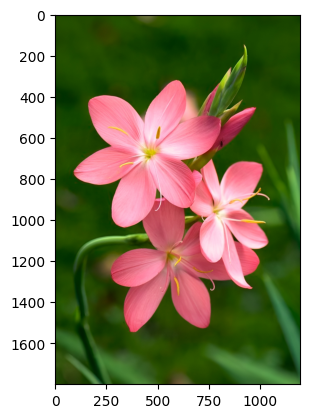

In [3]:
image_path='/content/drive/MyDrive/pretty little flower.jpg' # Replace with your image path
#image = cv2.imread(image_path)
#imageg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = Image.open(image_path).convert("RGB")
image_arr = np.array(image)
plt.imshow(image)
print(image) # shows dimensions of the image
# print(image_arr) #image in matrix form

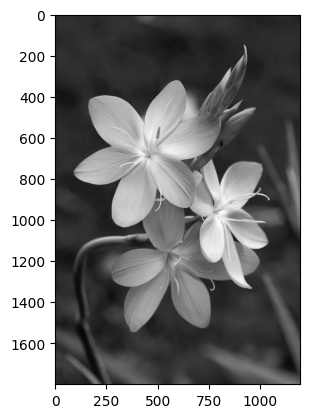

In [4]:
gray_image = cv2.cvtColor(image_arr, cv2.COLOR_RGB2GRAY)
gray_image_arr = np.array(gray_image)
plt.imshow(gray_image, cmap='gray')

In [5]:
# # print(gray_image_arr.shape)
# def add_noise(gray_image_arr):
#   row, col = gray_image_arr.shape
#   # number_of_pixels = random.randint(300, 10000)
#   number_of_pixels = math.floor((30/100)*row*col)
#   for i in range(number_of_pixels):
#     y_coord = random.randint(0, row - 1)
#     x_coord = random.randint(0, col - 1)
#     # Color that pixel to white
#     gray_image_arr[y_coord][x_coord]=255

#   # number_of_pixels = random.randint(300, 10000)
#   number_of_pixels = math.floor((30/100)*row*col)
#   for i in range(number_of_pixels):
#     y_coord = random.randint(0, row - 1)
#     x_coord = random.randint(0, col - 1)
#     # Color that pixel to black
#     gray_image_arr[y_coord][x_coord]=0

#   return gray_image_arr

In [6]:
def add_salt_and_pepper_noise(img, salt_ratio=0.3, pepper_ratio=0.3):
    """
    Adds salt and pepper noise to an image.

    Args:
        image (numpy.ndarray): Input image.
        salt_ratio (float): Ratio of salt noise (default: 0.05).
        pepper_ratio (float): Ratio of pepper noise (default: 0.05).

    Returns:
        numpy.ndarray: Image with salt and pepper noise.
    """
    noisy_img = np.copy(img)
    row, col = noisy_img.shape
    salt = np.random.rand(row, col) < salt_ratio
    pepper = np.random.rand(row, col) < pepper_ratio
    noisy_img[salt] = 255
    noisy_img[pepper] = 0
    return noisy_img

Text(0.5, 1.0, 'Noised Image')

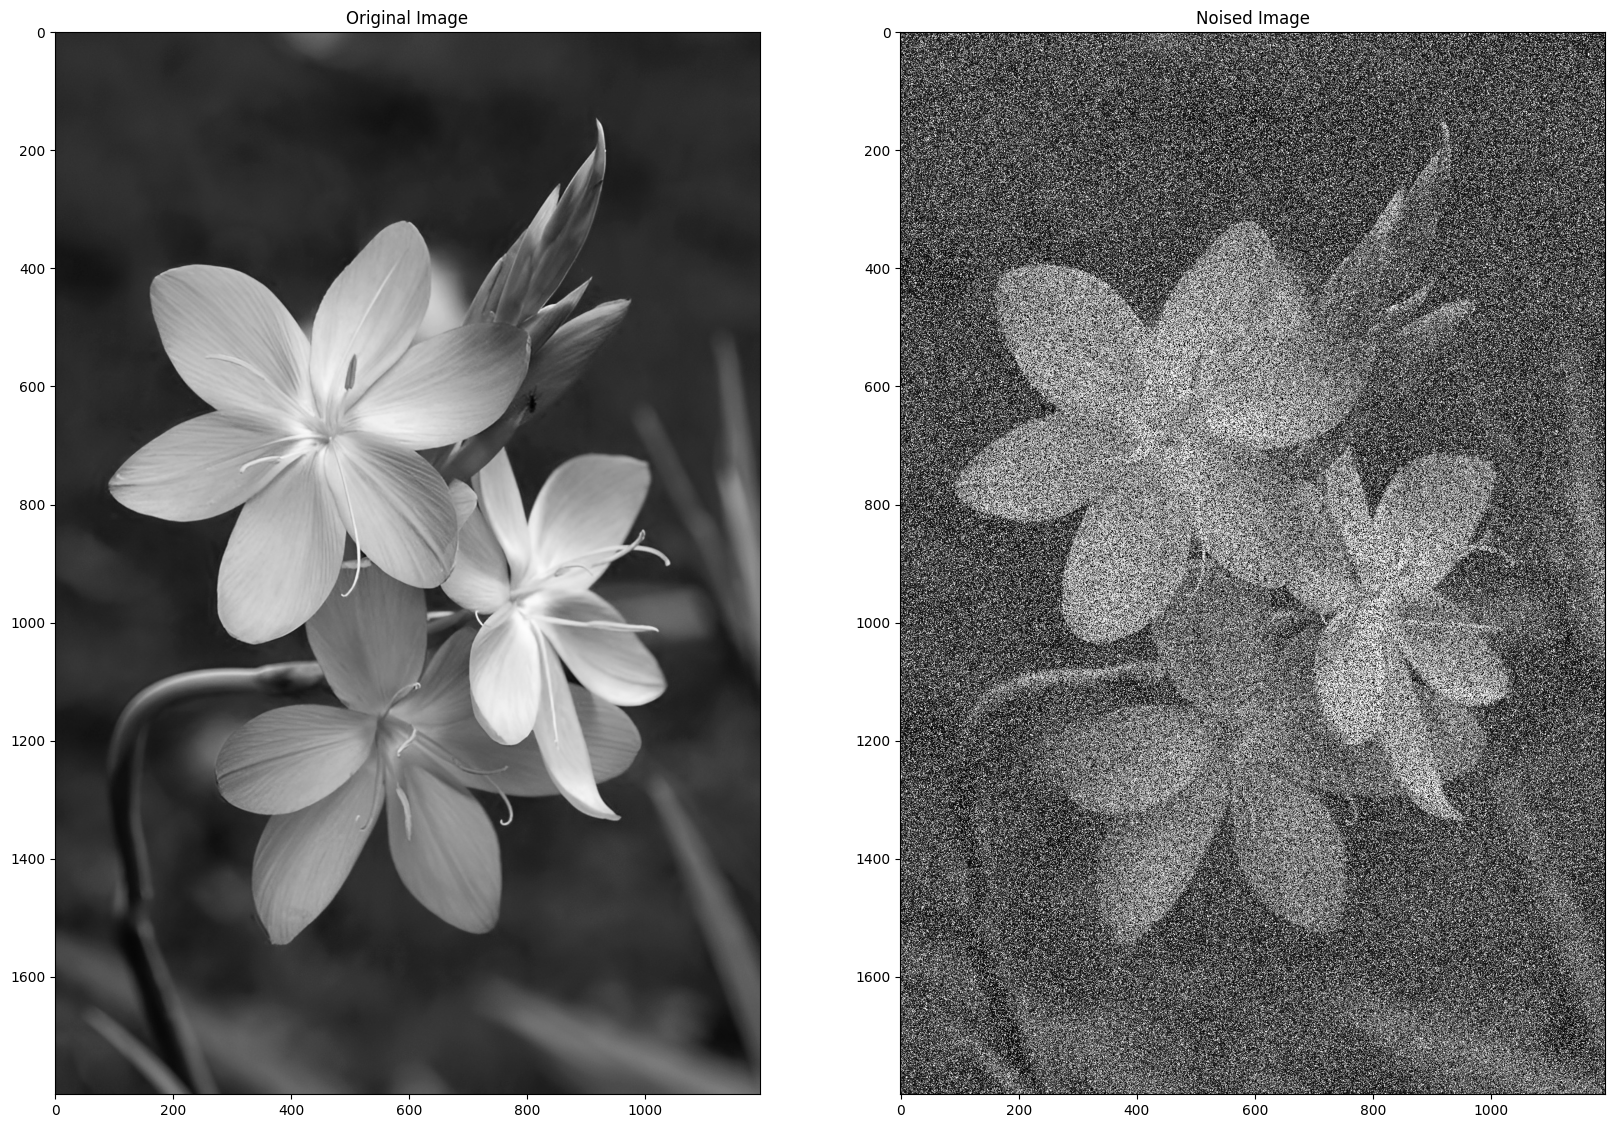

In [7]:
noised_image_arr = add_salt_and_pepper_noise(gray_image_arr)
noised_image = Image.fromarray(noised_image_arr)
fig, axes = plt.subplots(1, 2, figsize=(20, 100))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title("Original Image")
axes[1].imshow(noised_image, cmap='gray')
axes[1].set_title("Noised Image")

In [8]:
# Start with a small window (e.g., 3x3).

# Compute:

  # Zmin = minimum pixel in the window

  # Zmax = maximum pixel in the window

  # Zmed = median of the window

  # Zxy = value of the central pixel

# Stage A – Check if Zmed is a valid median:

  # If Zmin < Zmed < Zmax, go to Stage B

  # Else, increase window size and repeat (until max size is reached)

# Stage B – Check if Zxy is noise:

  # If Zmin < Zxy < Zmax, keep Zxy

  # Else, replace with Zmed

def adaptive_median_filter(img, max_window_size=7):
    padded_img = np.pad(img, max_window_size // 2, mode='edge')
    # 'constant': pads with a constant value (default is 0)
    # 'edge': pads with the edge values of the array

    filtered_img = np.copy(img)
    rows, cols = img.shape

    for i in range(rows):
        for j in range(cols):
            window_size = 3
            while window_size <= max_window_size:
                half = window_size // 2
                local_window = padded_img[i:i+window_size, j:j+window_size]
                Zmin = np.min(local_window)
                Zmax = np.max(local_window)
                Zmed = np.median(local_window)
                Zxy = padded_img[i + half, j + half] #center pixel

                A1 = int(Zmed) - int(Zmin)
                A2 = int(Zmed) - int(Zmax)

                if A1 > 0 and A2 < 0:
                    B1 = int(Zxy) - int(Zmin)
                    B2 = int(Zxy) - int(Zmax)
                    if B1 > 0 and B2 < 0:
                        filtered_img[i, j] = Zxy
                    else:
                        filtered_img[i, j] = Zmed
                    break
                else:
                    window_size += 2
            else:
                filtered_img[i, j] = Zmed

    return filtered_img

Text(0.5, 1.0, 'Filtered Image')

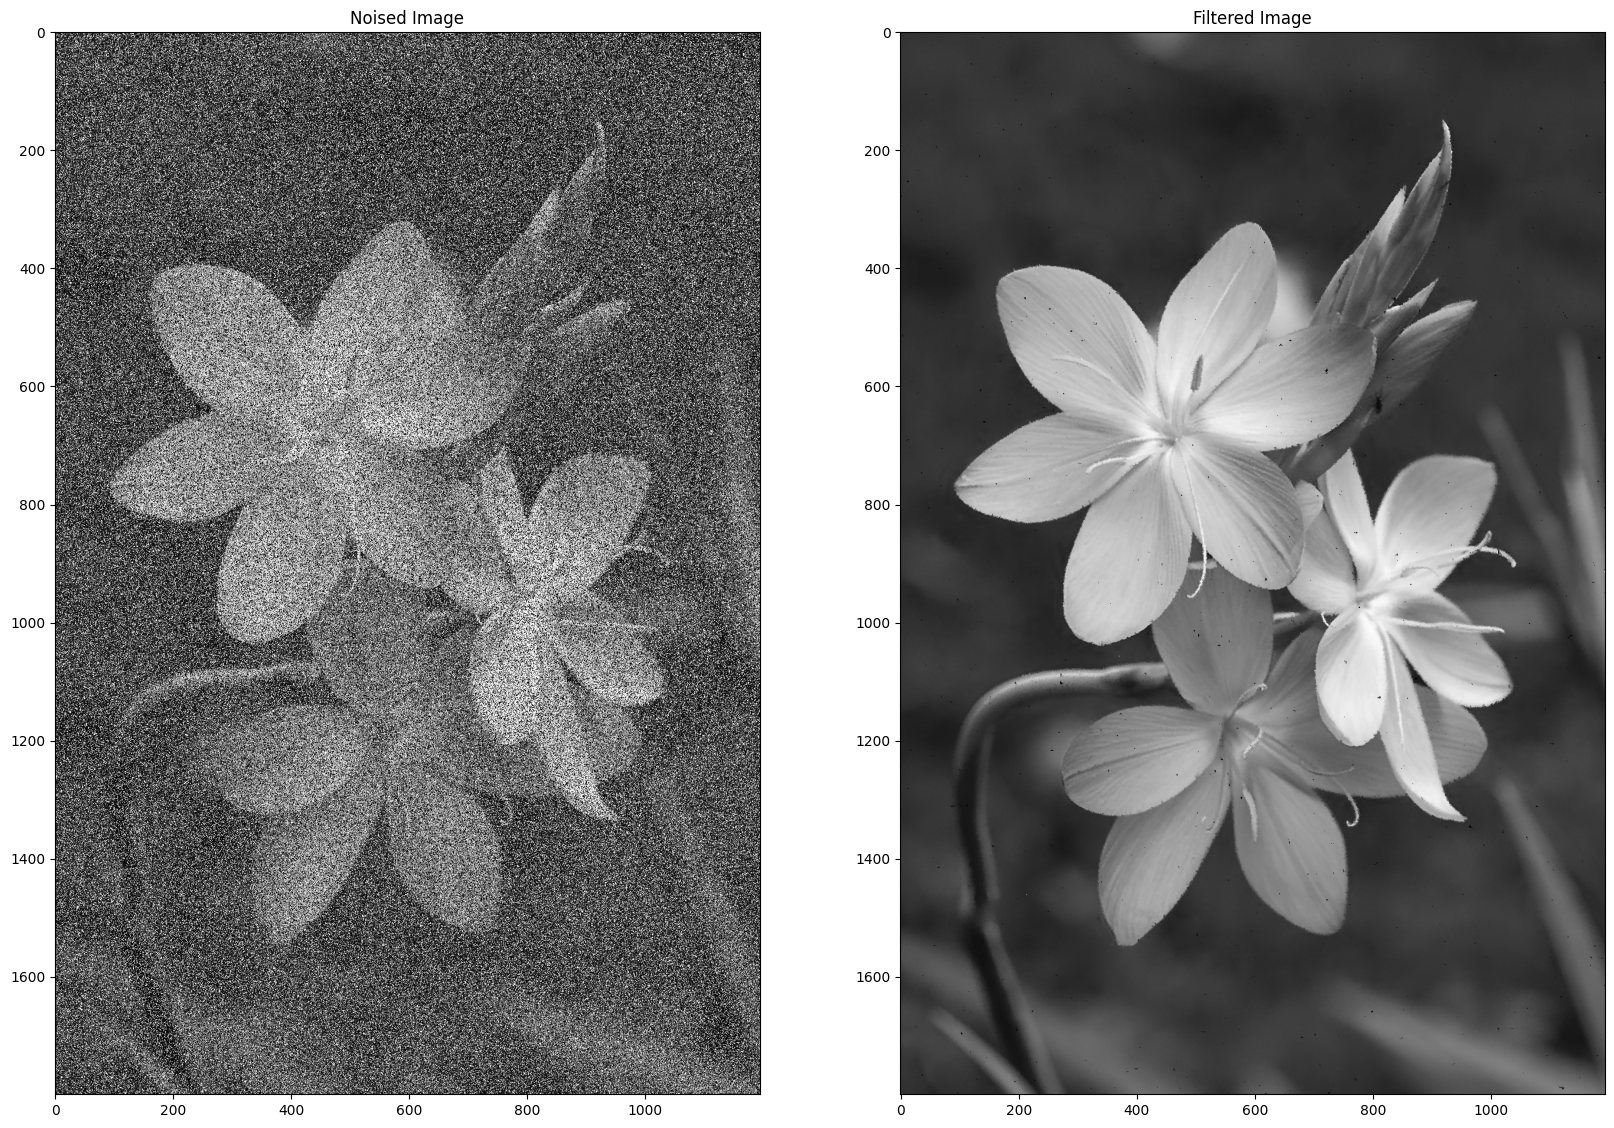

In [9]:
filtered_image_arr = adaptive_median_filter(noised_image_arr)
filtered_image = Image.fromarray(filtered_image_arr)
fig, axes = plt.subplots(1, 2, figsize=(20, 100))
axes[0].imshow(noised_image, cmap='gray')
axes[0].set_title("Noised Image")
# axes[1].imshow(filtered_image, cmap='gray')
axes[1].imshow(filtered_image_arr, cmap='gray')
axes[1].set_title("Filtered Image")

Text(0.5, 1.0, 'Edge Image')

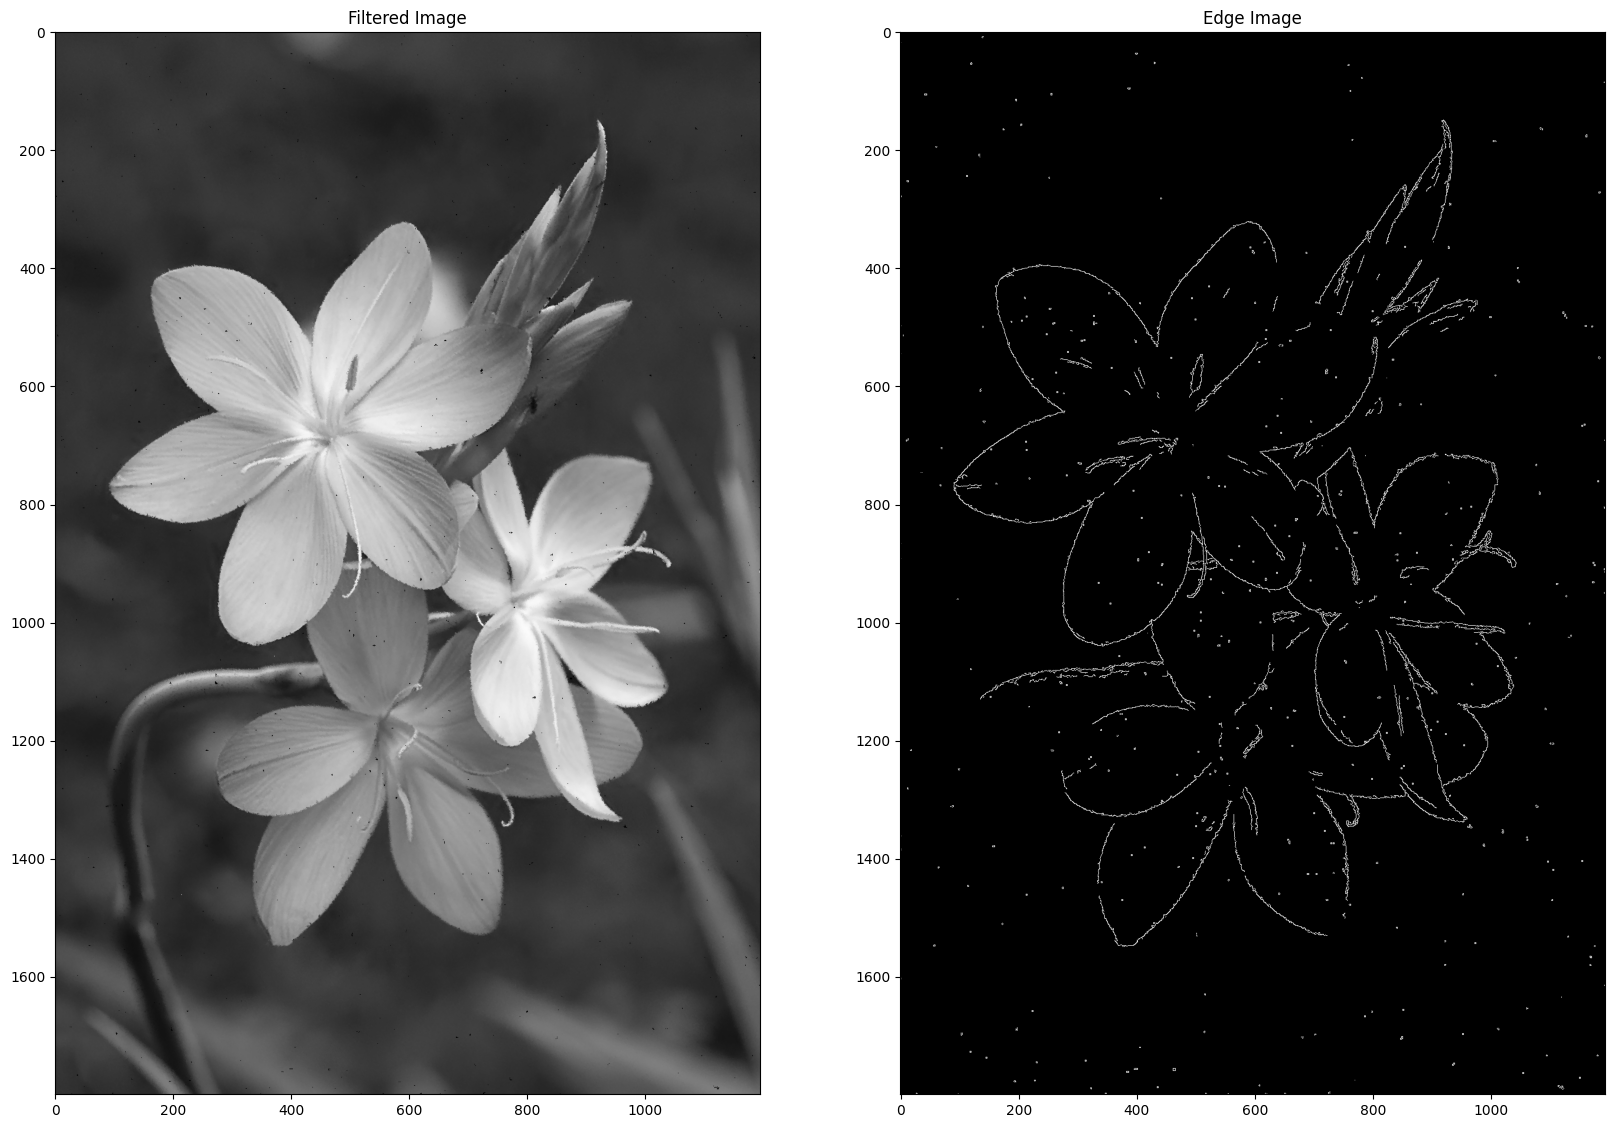

In [10]:
#  First argument is our input image. Second and third arguments are our minVal and maxVal respectively
# Hysteresis Thresholding
# This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded
edges_image_arr = cv2.Canny(filtered_image_arr,100,200)
edges_image = Image.fromarray(edges_image_arr)
fig, axes = plt.subplots(1, 2, figsize=(20, 100))
# imshow shows array as an image
# matplotlib.pyplot.imshow() does support PIL Images directly — it internally converts them to NumPy arrays for display.
axes[0].imshow(filtered_image_arr, cmap='gray')
axes[0].set_title("Filtered Image")
axes[1].imshow(edges_image_arr, cmap='gray')
axes[1].set_title("Edge Image")

Text(0.5, 1.0, 'Edge Image')

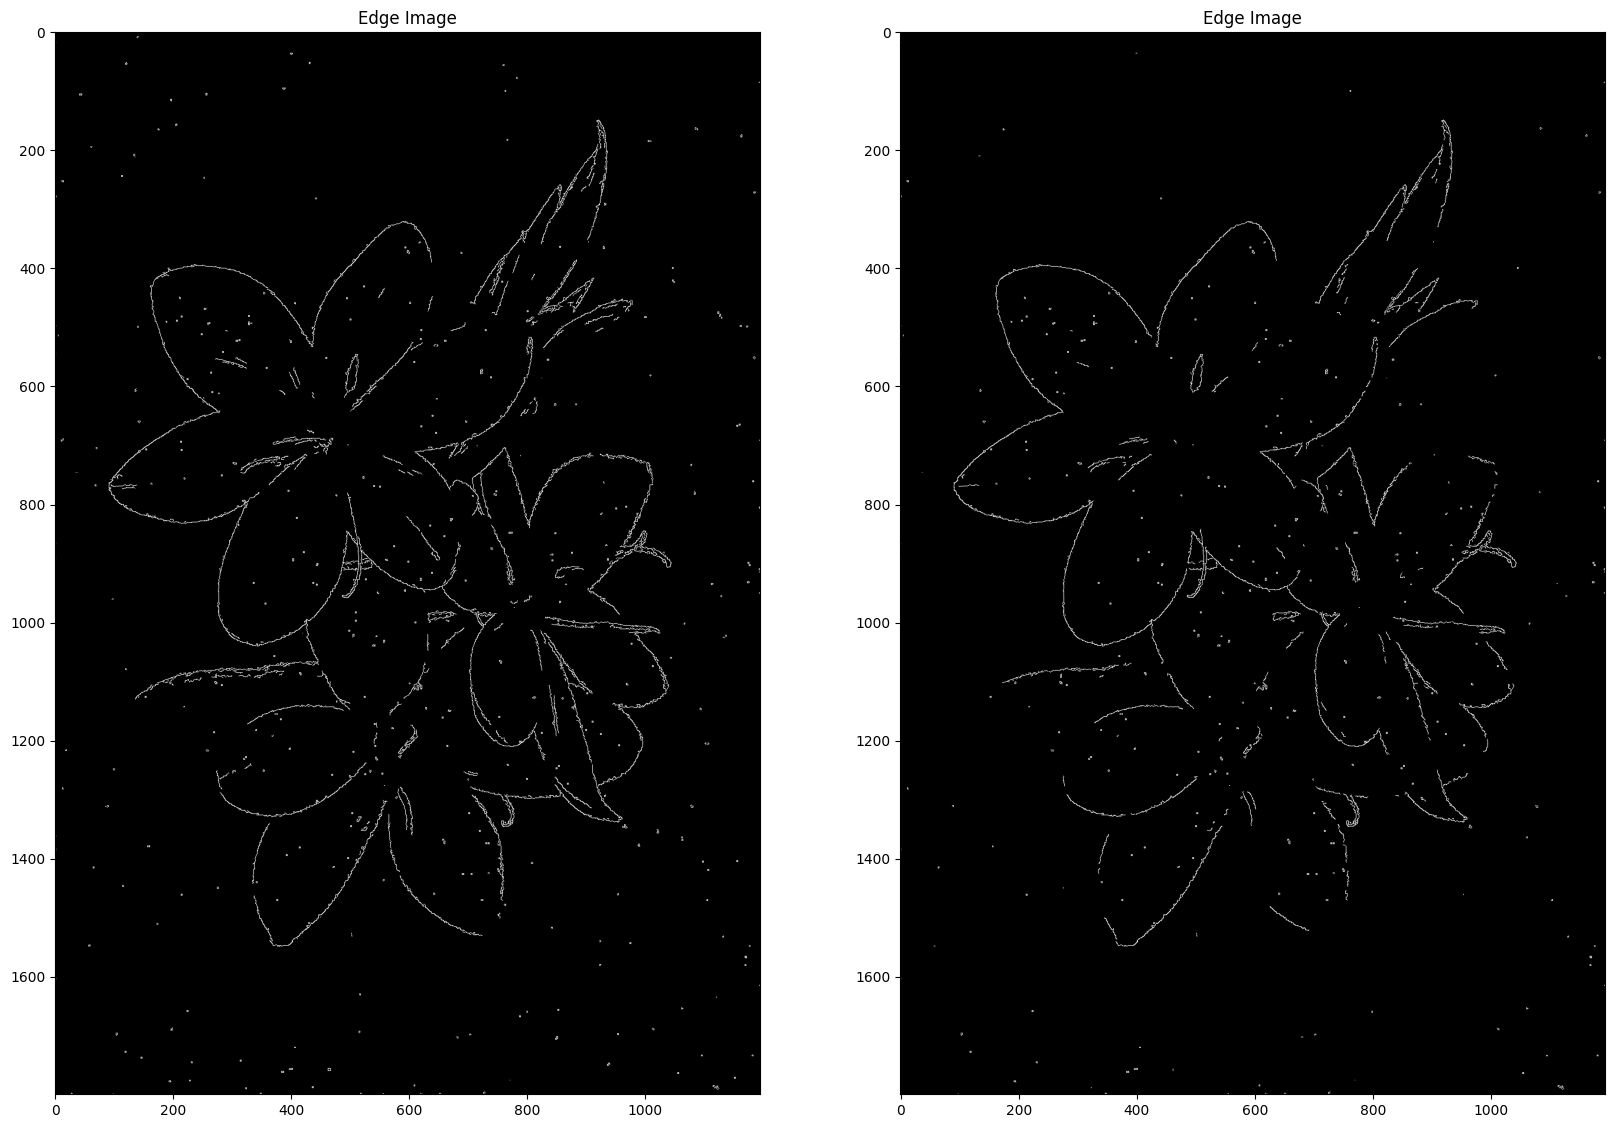

In [11]:
#  First argument is our input image. Second and third arguments are our minVal and maxVal respectively
# Hysteresis Thresholding
# This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded
edges = cv2.Canny(filtered_image_arr,100,200)
edges1 = cv2.Canny(filtered_image_arr,150,255)

fig, axes = plt.subplots(1, 2, figsize=(20, 100))
# imshow shows array as an image
# matplotlib.pyplot.imshow() does support PIL Images directly — it internally converts them to NumPy arrays for display.

axes[0].imshow(edges, cmap='gray')
axes[0].set_title("Edge Image")
axes[1].imshow(edges1, cmap='gray')
axes[1].set_title("Edge Image")

Otsu's threshold value: 114.0 



Text(0.5, 1.0, 'Binary Image')

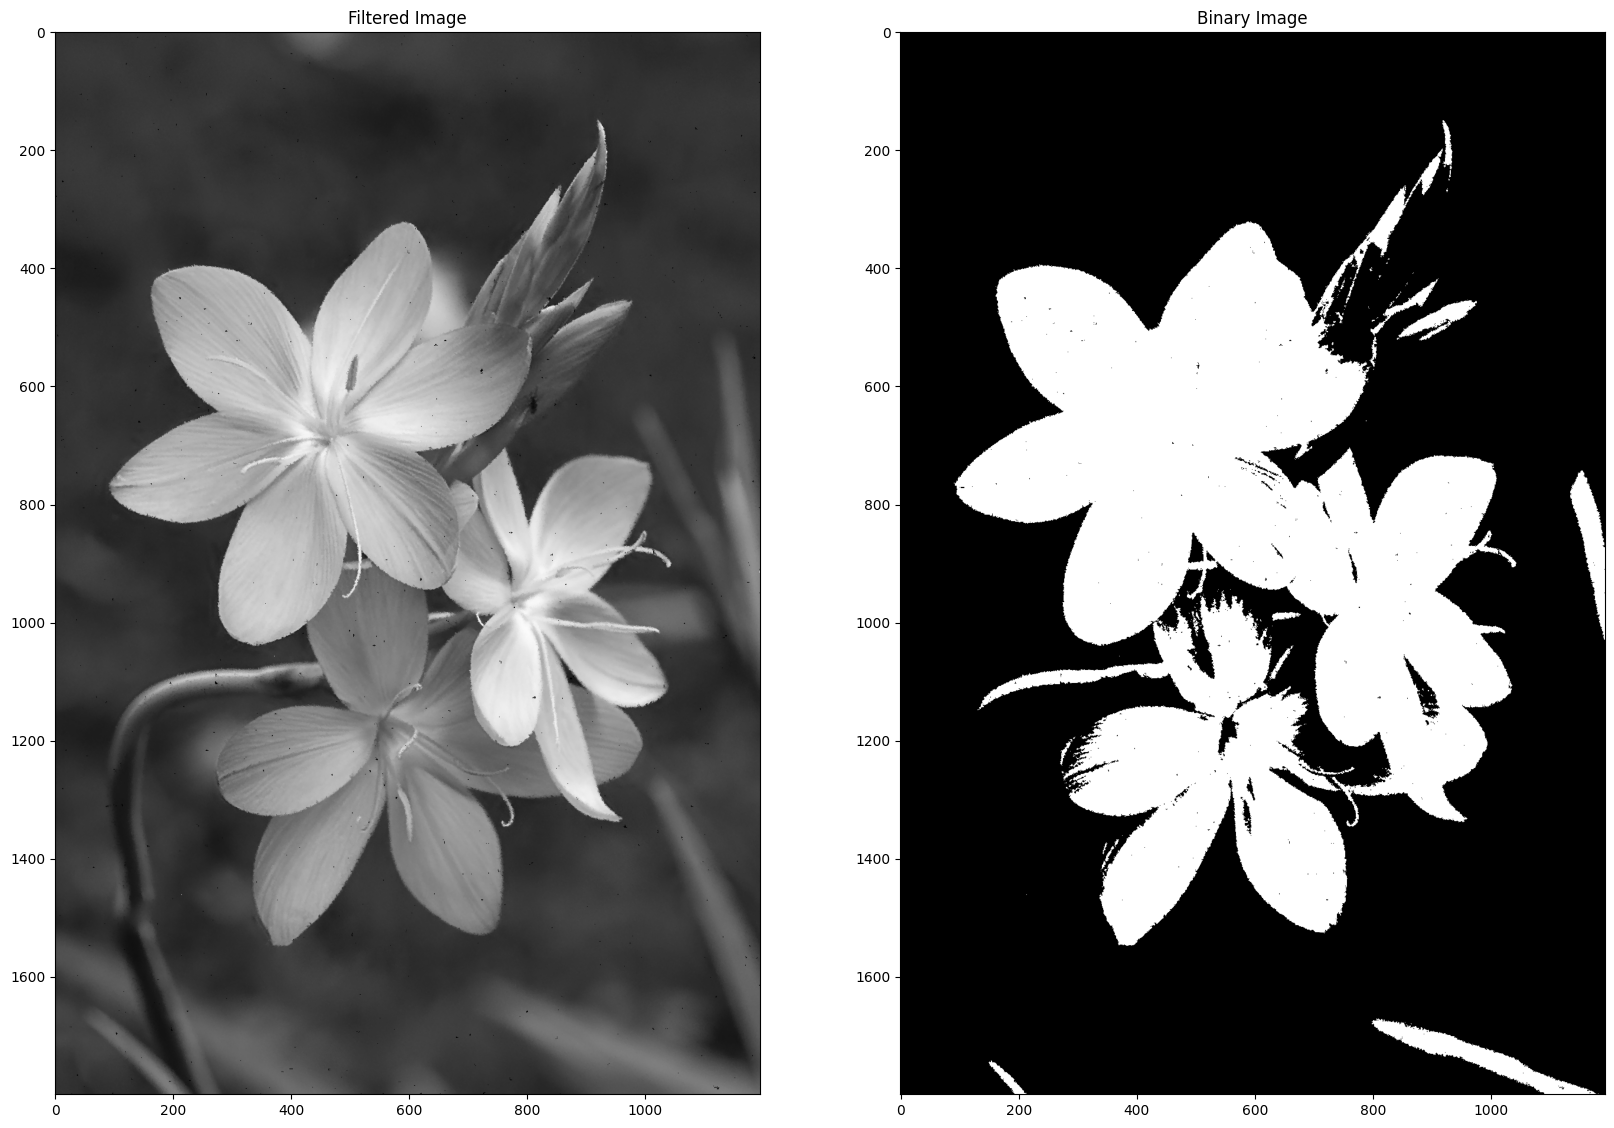

In [12]:

# Apply Otsu's thresholding
threshold_value, binary_image_arr = cv2.threshold(filtered_image_arr, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#Here's what each argument means:
# image: The input grayscale image (required for thresholding).

# 0: The threshold value. When using cv2.THRESH_OTSU, this is just a placeholder — the actual threshold will be automatically calculated by the algorithm.

# 255: The maximum value to assign to pixels that meet the threshold condition. In binary thresholding, this usually means setting white (255) for foreground pixels.

# cv2.THRESH_BINARY + cv2.THRESH_OTSU: This tells OpenCV to apply binary thresholding AND compute the optimal threshold using Otsu’s method.

# What it returns:
# threshold_value: The actual threshold value computed by Otsu’s method.

# binary_image: The resulting binary image (black and white), where:

# Pixels greater than the threshold are set to 255 (white).

# Pixels less than or equal to the threshold are set to 0 (black).
# Print threshold value
binary_image = Image.fromarray(binary_image_arr)

print(f"Otsu's threshold value: {threshold_value} \n")

fig, axes = plt.subplots(1, 2, figsize=(20, 100))
axes[0].imshow(filtered_image_arr, cmap='gray')
axes[0].set_title("Filtered Image")
axes[1].imshow(binary_image_arr, cmap='gray')
axes[1].set_title("Binary Image")

# Otsu’s method looks at the histogram of the image and automatically finds the best threshold value that separates foreground and background by minimizing the intra-class variance (the spread of pixel values within each group).
